In [1]:
from framed.io_utils.sbml import load_cbmodel
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
sns.set_style("white")
%matplotlib inline

In [2]:
%run '../src/gpr_mapping.py'
%run '../src/simulation.py'

## Load and transform iAF1260 model

In [3]:
model = load_cbmodel('../../models/iAF1260_reduced.xml', flavor='cobra')
model_ext = transform(model, inplace=False)

## Simulate the over/under-expression of b0116 (lpd)

In [4]:
sol = gene_pFBA(model_ext)
ref = sol.values['u_b0116']
biomass = model_ext.detect_biomass_reaction()
x0 = [1]
y0 = ([sol.values['R_PDH']], [sol.values['R_AKGDH']], [sol.values['R_GLYCL']])

Biomass reaction detected: R_Ec_biomass_iAF1260_core_59p81M


In [5]:
y1, y2, y3, mu = [], [], [], []
x = arange(0, 2.02, 0.02)

for k in x:
    sol = gene_pFBA(model_ext, constraints={'u_b0116': (ref*k, ref*k)})
    y1.append(sol.values['R_PDH'])
    y2.append(sol.values['R_AKGDH'])
    y3.append(sol.values['R_GLYCL'])
    mu.append(sol.values[biomass])

## Plot results

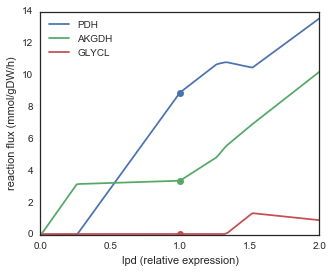

In [6]:
colors = sns.color_palette()
plt.figure(figsize=(5,4))
plt.plot(x, y1, color=colors[0])
plt.plot(x, y2, color=colors[1])
plt.plot(x, y3, color=colors[2])
plt.plot(x0, y0[0], 'o', color=colors[0])
plt.plot(x0, y0[1], 'o', color=colors[1])
plt.plot(x0, y0[2], 'o', color=colors[2])
plt.legend(['PDH', 'AKGDH', 'GLYCL'], loc='best')
plt.xlabel('lpd (relative expression)')
plt.ylabel('reaction flux (mmol/gDW/h)')
plt.savefig('../../results/phenotype/lpd.png', dpi=150)